In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [49]:
data=pd.read_csv('./Data/second_target.csv')

In [50]:
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,...,204,6283,4828,402,2286,2963,2673,1717,1068,16
1,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,...,11,825,1041,243,629,307,322,269,97,1
2,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,...,136,519,635,0,185,339,242,279,112,2
3,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,...,66,1778,2175,31,1505,1155,439,566,256,3
4,2021,1,A,골목상권,11110,종로구,11110600,가회동,1000001,계동길,...,676,7523,9187,208,2471,4577,3857,2990,2609,4


In [51]:
data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '행정동_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명',
       '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율', '주말_매출_비율', '월요일_매출_비율',
       '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율', '금요일_매출_비율', '토요일_매출_비율',
       '일요일_매출_비율', '시간대_00~06_매출_비율', '시간대_06~11_매출_비율', '시간대_11~14_매출_비율',
       '시간대_14~17_매출_비율', '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율',
       '여성_매출_비율', '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율',
       '연령대_40_매출_비율', '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액',
       '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액',
       '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액',
       '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액',
       '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액',
       '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액',
       '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수',

### 매출관련된 데이터를 가지고 매출을 맞추는 것은 무의미하므로 제거하도록 하겠다.

In [52]:
# 금액 관련 컬럼들
data.iloc[:,37:60].head(1)

,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,...,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액
0,242037775,74725393,57136142,41033472,48781382,47969401,47117378,42400357,32325036,0,...,119617655,10337108,142816088,102606323,2135084,48675387,61681122,56897678,46180705,29852436


In [53]:
# 금액 관련 컬럼 제거하기
data=pd.concat([data.iloc[:,:37],data.iloc[:,60:]],axis=1)

In [54]:
data.to_csv('./Data/매출관련제거후.csv',index=False)

### Backward Elimination & Forward Elimination
#### Sci-Kit 이용한 Feature Selection : Recursive Feature Elimination

In [55]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [56]:
input = data.iloc[:,14:].to_numpy()
target = data.iloc[:,13].to_numpy()
names = pd.DataFrame(data.iloc[:,14:].columns)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
input_scaled=scaler.fit_transform(input)

In [58]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target , test_target = \
    train_test_split(input_scaled,target,test_size=0.2)

In [59]:
# linearregression을 모델로 체택
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
rfe_mod = RFECV(lr, cv=5 ,step=1)
myvalues=rfe_mod.fit(train_input,train_target)
myvalues.support_
myvalues.ranking_
rankings=pd.DataFrame(myvalues.ranking_)
rankings

,0
0,17
1,18
2,24
3,22
4,23
5,21
6,25
7,19
8,20
9,29


In [60]:
rankings[rankings[0]==1].index

Int64Index([23, 24], dtype='int64')

In [61]:
names.iloc[rankings[rankings[0]==1].index,:]

,0
23,주중_매출_건수
24,주말_매출_건수


In [62]:
input_scaled = input_scaled[:,rankings[rankings[0]==1].index]

In [63]:
train_input, test_input, train_target , test_target = \
    train_test_split(input_scaled,target,test_size=0.2)

In [64]:
from sklearn.model_selection import cross_validate
scores = cross_validate(
    lr,
    train_input,
    train_target,
    return_train_score=True
)

print(np.mean(scores['test_score']))
print(np.mean(scores['train_score']))

0.9999999999999977
0.9999999999999976


> ##### 매출 건수로 나의 매출을 맞추기 위해서는 매출 건수 역시 예측을 해야 되기 때문에 예측도는 높지만 feature로서 적합하지 못하다고 판단하였고,
> ##### 다시 feature selection을 비율과 점포수만 가지고 해보도록 하자.

### Feature Selection
### Filter Method 방식 
: 상관계수가 높은 것을 3 , 5, 7 , ... 이런식으로 계속 늘려가면서 예측력을 측정해보자.

In [65]:
data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '행정동_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명',
       '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율', '주말_매출_비율', '월요일_매출_비율',
       '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율', '금요일_매출_비율', '토요일_매출_비율',
       '일요일_매출_비율', '시간대_00~06_매출_비율', '시간대_06~11_매출_비율', '시간대_11~14_매출_비율',
       '시간대_14~17_매출_비율', '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율',
       '여성_매출_비율', '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율',
       '연령대_40_매출_비율', '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',
       '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수',
       '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수',
       '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수', '여성_매출_건수',
       '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수',
       '연령대_50_매출_건수', '연령대_60_이상_매출_건수', '점포수'],
      dtype='object')

In [66]:
input = data[['주중_매출_비율', '주말_매출_비율', '월요일_매출_비율',
       '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율', '금요일_매출_비율', '토요일_매출_비율',
       '일요일_매출_비율', '시간대_00~06_매출_비율', '시간대_06~11_매출_비율', '시간대_11~14_매출_비율',
       '시간대_14~17_매출_비율', '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율',
       '여성_매출_비율', '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율',
       '연령대_40_매출_비율', '연령대_50_매출_비율', '연령대_60_이상_매출_비율','점포수']]
target = data[['분기당_매출_금액']]
total = data[['분기당_매출_금액','주중_매출_비율', '주말_매출_비율', '월요일_매출_비율',
       '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율', '금요일_매출_비율', '토요일_매출_비율',
       '일요일_매출_비율', '시간대_00~06_매출_비율', '시간대_06~11_매출_비율', '시간대_11~14_매출_비율',
       '시간대_14~17_매출_비율', '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율',
       '여성_매출_비율', '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율',
       '연령대_40_매출_비율', '연령대_50_매출_비율', '연령대_60_이상_매출_비율','점포수']]

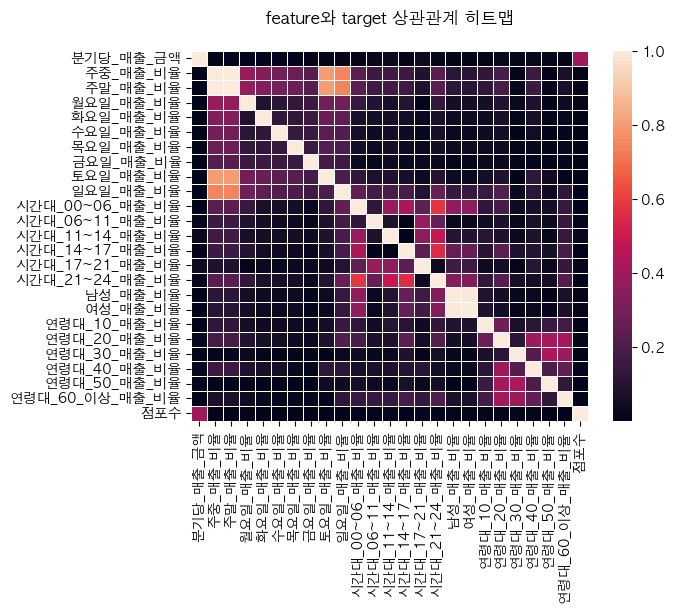

In [67]:
sns.heatmap(
    np.abs(total.corr()),
    fmt='f',
    linewidths=0.5
)

plt.title('feature와 target 상관관계 히트맵',pad=20)

plt.show()

> ##### 주당,주말 매출 비율이나 남성,여성 매출 비율은 두가지로 나눈것이기 때문에 상관관계를 따지면 역상관관계여서 높은 값을 보여준다.

In [68]:
table = np.abs(total.corr())
table=table['분기당_매출_금액'].sort_values(ascending=False)

In [69]:
rank=table.index[1:]

### 예측력 확인하기

In [70]:
target = target.to_numpy()

In [71]:
for i in range(3,20,2):
    input = data[rank[:i]]
    input_scaled = scaler.fit_transform(input)
    scores = cross_validate(
        lr,
        input_scaled,
        target,
        return_train_score=True
    )

    print(np.mean(scores['train_score']))
    print(np.mean(scores['test_score']))

0.18253048573727676
-0.4547850282424921
0.1828408193904124
-0.45379403700648774
0.18339592117551617
-0.4578557192537156
0.18344005028702898
-0.45896643714124313
0.18357755876888746
-0.4583137043399902
0.183593263968655
-0.4583160578353058
0.18362169346450047
-0.4582321190430186
0.18363105357780202
-0.4582947930779168
0.18364775739600742
-0.4583461240982351


> ##### Filter Method 방식으로 feature selection을 실행하였을 때, 제대로된 예측력이 나오지 않았다.

### Wrapper Method
- Forward Selection

In [72]:
from feature_selection import forward

In [73]:
input = data[['주중_매출_비율', '주말_매출_비율', '월요일_매출_비율',
       '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율', '금요일_매출_비율', '토요일_매출_비율',
       '일요일_매출_비율', '시간대_00~06_매출_비율', '시간대_06~11_매출_비율', '시간대_11~14_매출_비율',
       '시간대_14~17_매출_비율', '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율',
       '여성_매출_비율', '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율',
       '연령대_40_매출_비율', '연령대_50_매출_비율', '연령대_60_이상_매출_비율','점포수']]
target = data.iloc[:,13:14]
input_scaled=scaler.fit_transform(input)
train_input, test_input, train_target , test_target = \
    train_test_split(input_scaled,target,test_size=0.2)

In [74]:
#!pip install mlxtend

In [75]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

for i in range(3,7,2):
    sfs = SFS(LinearRegression(),
            k_features=i,
            forward=True,
            floating=False,
            scoring = 'r2',
            cv = 5)

    sfs.fit(train_input, train_target)
    print(sfs.k_feature_names_)

('10', '18', '23')
('8', '10', '18', '19', '23')


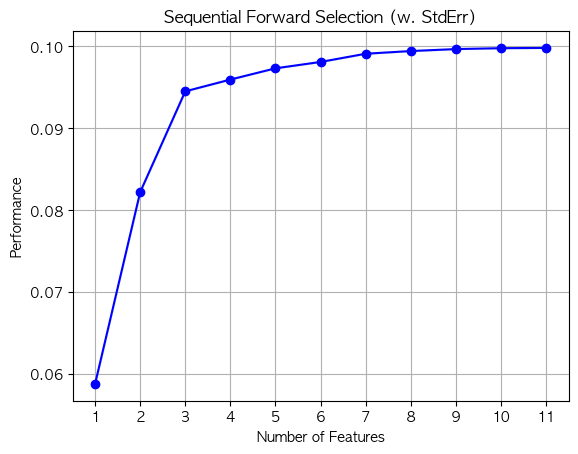

In [76]:
sfs1 = SFS(LinearRegression(),
         k_features=(3,11),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(train_input, train_target)

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

- Backward Elimination

In [77]:
for i in range(3,7,2):
    sfs = SFS(LinearRegression(),
            k_features=i,
            forward=False,
            floating=False,
            cv = 0)

    sfs.fit(train_input, train_target)
    print(sfs.k_feature_names_)

('10', '18', '23')
('8', '10', '18', '19', '23')


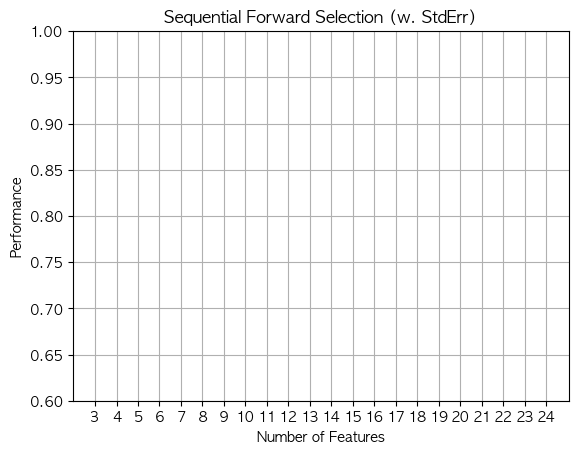

In [78]:
sfs1 = SFS(LinearRegression(),
         k_features=(3,11),
         forward=False,
         floating=False,
         cv=0)
sfs1.fit(train_input, train_target)

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.ylim(0.06,0.1)
plt.grid()
plt.show()

- step-wise selection

In [79]:
for i in range(3,7,2):
    sfs = SFS(LinearRegression(),
            k_features=i,
            forward=True,
            floating=True,
            cv = 0)

    sfs.fit(train_input, train_target)
    print(sfs.k_feature_names_)

('10', '18', '23')
('8', '10', '18', '19', '23')


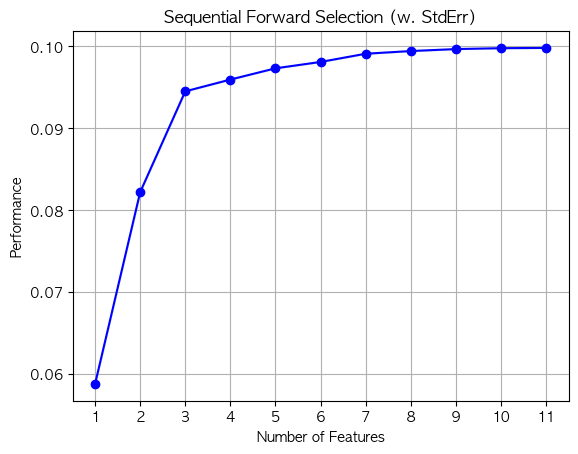

In [80]:
sfs1 = SFS(LinearRegression(),
         k_features=(3,11),
         forward=True,
         floating=True,
         cv=0)
sfs1.fit(train_input, train_target)

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

### 유의미하지는 않지만, 3개로 하나 5개로 하나 비슷비슷하다. 그러니까 3개만 남겨두고 다 없애도록 하겠다.